In [3]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import os
import conda

conda_file_dir = conda.__file__
conda_dir = conda_file_dir.split('lib')[0]
proj_lib = os.path.join(os.path.join(conda_dir, 'share'), 'proj')
os.environ["PROJ_LIB"] = proj_lib
from mpl_toolkits.basemap import Basemap
import numpy as np
import seaborn as sns

In [5]:
#Load csv files
costco_df = pd.read_csv("C:\BU\DSC640\wk7-8\data/costcos-geocoded.csv")
ppg_df = pd.read_csv("C:\BU\DSC640\wk7-8\data/ppg2008.csv")

In [6]:
costco_df.head()

,Address,City,State,Zip Code,Latitude,Longitude
0,1205 N. Memorial Parkway,Huntsville,Alabama,35801-5930,34.743095,-86.600955
1,3650 Galleria Circle,Hoover,Alabama,35244-2346,33.377649,-86.812420
2,8251 Eastchase Parkway,Montgomery,Alabama,36117,32.363889,-86.150884
3,5225 Commercial Boulevard,Juneau,Alaska,99801-7210,58.359200,-134.483000
4,330 West Dimond Blvd,Anchorage,Alaska,99515-1950,61.143266,-149.884217


In [7]:
ppg_df.head()

,Name,G,MIN,PTS,FGM,FGA,FGP,FTM,FTA,FTP,...,3PA,3PP,ORB,DRB,TRB,AST,STL,BLK,TO,PF
0,Dwyane Wade,79,38.6,30.2,10.8,22.0,0.491,7.5,9.8,0.765,...,3.5,0.317,1.1,3.9,5.0,7.5,2.2,1.3,3.4,2.3
1,LeBron James,81,37.7,28.4,9.7,19.9,0.489,7.3,9.4,0.780,...,4.7,0.344,1.3,6.3,7.6,7.2,1.7,1.1,3.0,1.7
2,Kobe Bryant,82,36.2,26.8,9.8,20.9,0.467,5.9,6.9,0.856,...,4.1,0.351,1.1,4.1,5.2,4.9,1.5,0.5,2.6,2.3
3,Dirk Nowitzki,81,37.7,25.9,9.6,20.0,0.479,6.0,6.7,0.890,...,2.1,0.359,1.1,7.3,8.4,2.4,0.8,0.8,1.9,2.2
4,Danny Granger,67,36.2,25.8,8.5,19.1,0.447,6.0,6.9,0.878,...,6.7,0.404,0.7,4.4,5.1,2.7,1.0,1.4,2.5,3.1


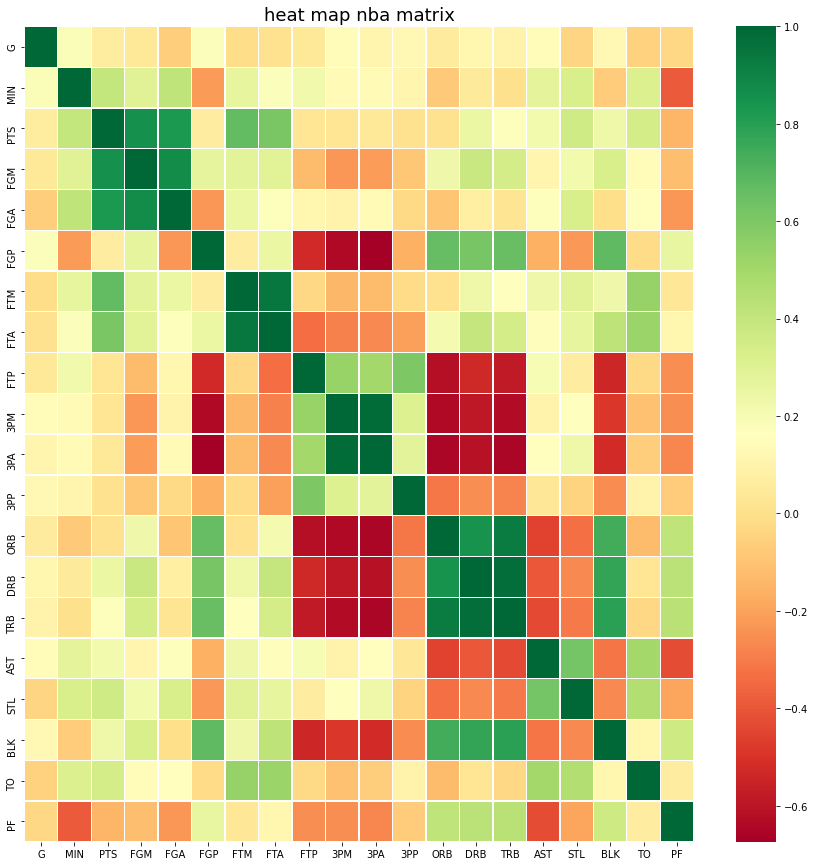

In [8]:
# heat map
# reference: https://seaborn.pydata.org/generated/seaborn.heatmap.html
fig, ax = plt.subplots(figsize=(15,15))
title = "heat map nba matrix"
plt.title(title,fontsize=18)
ttl=ax.title
ttl.set_position([0.5,1.05])

sns.heatmap(ppg_df.corr(), annot=False,fmt="",cmap='RdYlGn',linewidths=0.30,ax=ax)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


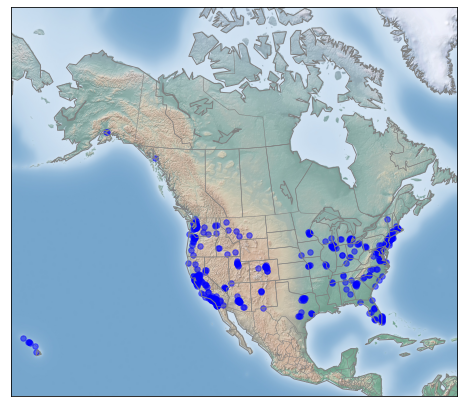

In [41]:
# spatial chart
fig = plt.figure(figsize=(8, 8))
lat = costco_df['Latitude'].values
lon = costco_df['Longitude'].values
m = Basemap(projection='lcc', resolution='c', 
            llcrnrlat=10, urcrnrlat=70, llcrnrlon=-159,urcrnrlon=-30,lat_0=20, lon_0=-119)
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')

# scatter to plot Costco cities
m.scatter(lon, lat, latlon=True, c='b'
          , s=30,
          cmap='Reds', alpha=0.5)

plt.show()

# reference: https://jakevdp.github.io/PythonDataScienceHandbook/04.13-geographic-data-with-basemap.html


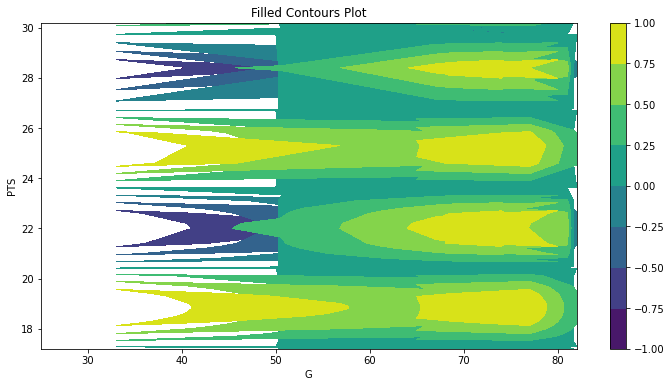

In [65]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

[X,Y] = np.meshgrid(ppg_df['G'],ppg_df['PTS'])
Z = np.sin(X)*np.cos(Y)
fig,ax=plt.subplots(figsize=(12,6))
cp = ax.contourf(X, Y, Z)
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Filled Contours Plot')
ax.set_xlabel('G')
ax.set_ylabel('PTS')
plt.show()
# reference: https://problemsolvingwithpython.com/06-Plotting-with-Matplotlib/06.14-Contour-Plots/